# Campaña de Marketing Bancario

## Comprensión empresarial

Los depósitos a largo plazo permiten a los bancos retener dinero durante un período de tiempo específico, lo que permite al banco utilizar ese dinero para mejorar sus inversiones. Las campañas de marketing de este producto se basan en llamadas telefónicas. Si un usuario no se encuentra disponible en un momento dado, entonces se le volverá a llamar de nuevo en otro momento.

## Descripción del problema

Un banco portugués está teniendo una disminución en sus ingresos, por lo que quieren poder identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo. Esto permitirá que el banco centre sus esfuerzos de marketing en esos clientes y evitará perder dinero y tiempo en clientes que probablemente no se suscribirán.

Para abordar este problema crearemos un algoritmo de clasificación que ayude a predecir si un cliente contratará o no un depósito a largo plazo.

### EDA

In [1]:
# pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
df = pd.read_csv(url, sep=";")  # si hay error de encoding: df = pd.read_csv(url, encoding="latin-1")

print("Shape:", df.shape)
df.head()


Shape: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
cat_cols = ["job","marital","education","default","housing","loan",
            "contact","month","day_of_week","poutcome","y"]
num_cols = ["age","duration","campaign","pdays","previous",
            "emp.var.rate","cons.price.idx","cons.conf.idx",
            "euribor3m","nr.employed"]

# convertir variables object a 'category' para optimizar EDA
for c in cat_cols:
    df[c] = df[c].astype("category")

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# duplicados y faltantes
df.duplicated().sum()

np.int64(12)

In [8]:
# ubicamos filas de duplicados
df[df.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [9]:
# % faltantes por columna
df.isna().mean().sort_values(ascending=False)  

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

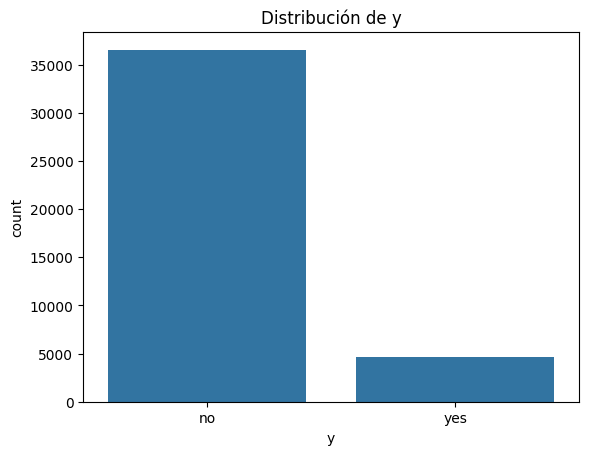

In [10]:
import seaborn as sns

# distribución de la variable target y 
df["y"].value_counts(normalize=True).rename("proportion")
sns.countplot(x="y", data=df)
plt.title("Distribución de y"); plt.show()


In [11]:
# aquí podemos ver que nuestras clases están desbalanceadísimas
# veamos nuestras clases numéricas
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [12]:
len(num_cols)

10

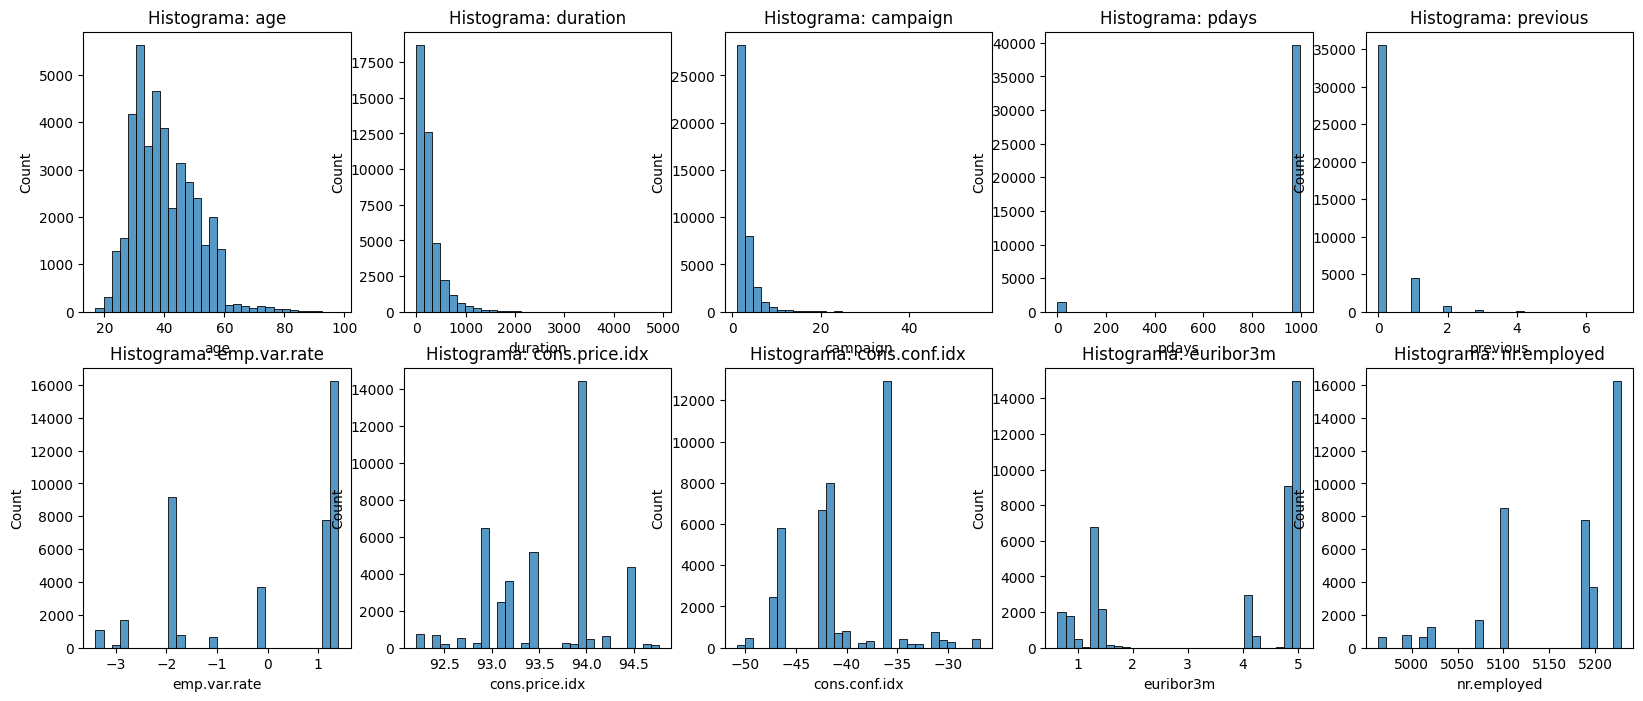

In [13]:
fig, axes = plt.subplots(2,5, figsize=(20,8))
axes = axes.flatten() # pasamos a lista

for i, c in enumerate(num_cols):
    sns.histplot(df[c].dropna(),bins=30, ax=axes[i])
    axes[i].set_title(f"Histograma: {c}")

In [14]:
# ahora analicemos nuestras columnas categóricas
df[cat_cols].apply(lambda s: s.nunique()).sort_values(ascending=False).rename("n_unique")

job            12
month          10
education       8
day_of_week     5
marital         4
default         3
housing         3
poutcome        3
loan            3
contact         2
y               2
Name: n_unique, dtype: int64

In [15]:
len(cat_cols)

11

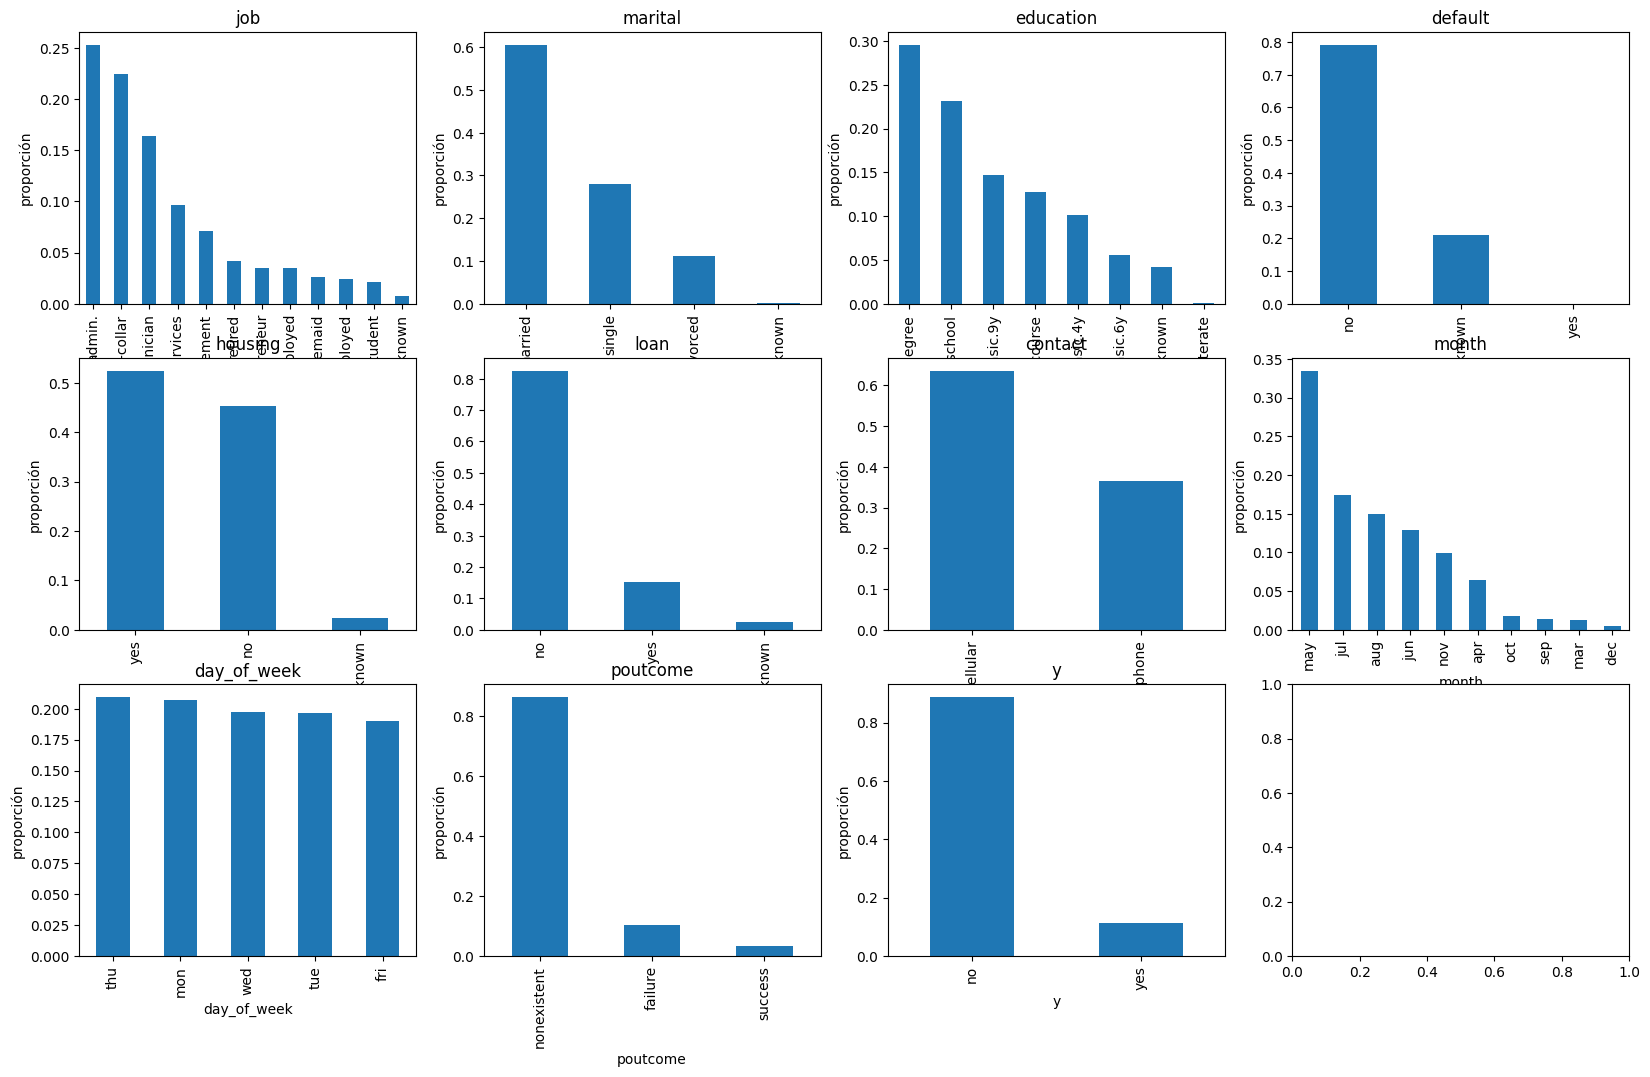

In [16]:
fig, axes = plt.subplots(3,4,figsize=(20,12))
axes = axes.flatten() # pasamos a lista

for i,c in enumerate(cat_cols):
    ax = axes[i]
    df[c].value_counts(normalize=True).head(12).plot(kind='bar', ax=ax) # obtenemos 12 porque el máximo fueron 12 cat distintas
    ax.set_title(f"{c}")
    ax.set_ylabel("proporción")

#### Relación con la target y (bivariado)
Es comparar una variable (puede ser numérica o categórica) con la variable objetivo del modelo. La idea es ver si existe algún patrón que pueda ayudar a predecirla.

Ejemplo (dataset Titanic):
* Si sexo = femenino y la target es sobrevive, podríamos descubrir que las mujeres tienen mayor probabilidad de supervivencia.
* Si edad aumenta, tal vez la probabilidad de sobrevivir baja.

In [17]:
# Numéricas -> Tasa por cuantiles
def rate_by_quantiles(col, q=5):
    bins=pd.qcut(df[col], q=q, duplicates='drop')
    return (df.groupby(bins)['y']
            .apply(lambda s: (s=='yes').mean())
            .sort_values(ascending=False))

# cada print corresponde a un intervalo de la variable
# el valor es la proporción de 'yes' en ese intervalo
for c in num_cols:
    print(c)
    display(rate_by_quantiles(c))

age


/tmp/ipykernel_28893/88672352.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(bins)['y']


age
(49.0, 98.0]      0.145127
(16.999, 31.0]    0.144051
(31.0, 35.0]      0.103717
(35.0, 41.0]      0.087308
(41.0, 49.0]      0.078768
Name: y, dtype: float64

duration


/tmp/ipykernel_28893/88672352.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(bins)['y']


duration
(368.0, 4918.0]    0.329968
(222.0, 368.0]     0.124556
(146.0, 222.0]     0.072758
(89.0, 146.0]      0.032436
(-0.001, 89.0]     0.005246
Name: y, dtype: float64

campaign


/tmp/ipykernel_28893/88672352.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(bins)['y']


campaign
(0.999, 2.0]    0.124451
(2.0, 3.0]      0.107471
(3.0, 56.0]     0.072692
Name: y, dtype: float64

pdays


/tmp/ipykernel_28893/88672352.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(bins)['y']


pdays
(-0.001, 999.0]    0.112654
Name: y, dtype: float64

previous


/tmp/ipykernel_28893/88672352.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(bins)['y']


previous
(-0.001, 7.0]    0.112654
Name: y, dtype: float64

emp.var.rate


/tmp/ipykernel_28893/88672352.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(bins)['y']


emp.var.rate
(-3.401, -1.8]    0.214806
(-1.8, -0.1]      0.183689
(1.1, 1.4]        0.053345
(-0.1, 1.1]       0.030916
Name: y, dtype: float64

cons.price.idx


/tmp/ipykernel_28893/88672352.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(bins)['y']


cons.price.idx
(92.19999999999999, 92.893]    0.184004
(93.994, 94.767]               0.154272
(92.893, 93.444]               0.107704
(93.444, 93.918]               0.093584
(93.918, 93.994]               0.030916
Name: y, dtype: float64

cons.conf.idx


/tmp/ipykernel_28893/88672352.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(bins)['y']


cons.conf.idx
(-36.4, -26.9]                  0.178114
(-50.800999999999995, -46.2]    0.140199
(-42.0, -40.0]                  0.139461
(-40.0, -36.4]                  0.072350
(-46.2, -42.0]                  0.057996
Name: y, dtype: float64

euribor3m


/tmp/ipykernel_28893/88672352.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(bins)['y']


euribor3m
(0.633, 1.299]    0.296549
(1.299, 4.191]    0.107829
(4.864, 4.962]    0.055189
(4.962, 5.045]    0.055029
(4.191, 4.864]    0.036230
Name: y, dtype: float64

nr.employed


/tmp/ipykernel_28893/88672352.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(bins)['y']


nr.employed
(4963.599, 5099.1]    0.244555
(5191.0, 5195.8]      0.062992
(5195.8, 5228.1]      0.053345
(5099.1, 5191.0]      0.031005
Name: y, dtype: float64

In [18]:
# Categóricas -> tasa de conversión
def target_rate_by(cat):
    return (df.groupby(cat)["y"]
             .apply(lambda s: (s == "yes").mean())
             .sort_values(ascending=False))

for c in cat_cols:
    display(target_rate_by(c).head(5))


/tmp/ipykernel_28893/2718964518.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(cat)["y"]


job
student       0.314286
retired       0.252326
unemployed    0.142012
admin.        0.129726
management    0.112175
Name: y, dtype: float64

marital
unknown     0.150000
single      0.140041
divorced    0.103209
married     0.101573
Name: y, dtype: float64

education
illiterate             0.222222
unknown                0.145003
university.degree      0.137245
professional.course    0.113485
high.school            0.108355
Name: y, dtype: float64

default
no         0.12879
unknown    0.05153
yes        0.00000
Name: y, dtype: float64

housing
yes        0.116194
no         0.108796
unknown    0.108081
Name: y, dtype: float64

loan
no         0.113402
yes        0.109315
unknown    0.108081
Name: y, dtype: float64

contact
cellular     0.147376
telephone    0.052313
Name: y, dtype: float64

month
mar    0.505495
dec    0.489011
sep    0.449123
oct    0.438719
apr    0.204787
Name: y, dtype: float64

day_of_week
thu    0.121188
tue    0.117800
wed    0.116671
fri    0.108087
mon    0.099483
Name: y, dtype: float64

poutcome
success        0.651129
failure        0.142286
nonexistent    0.088322
Name: y, dtype: float64

y
yes    1.0
no     0.0
Name: y, dtype: float64

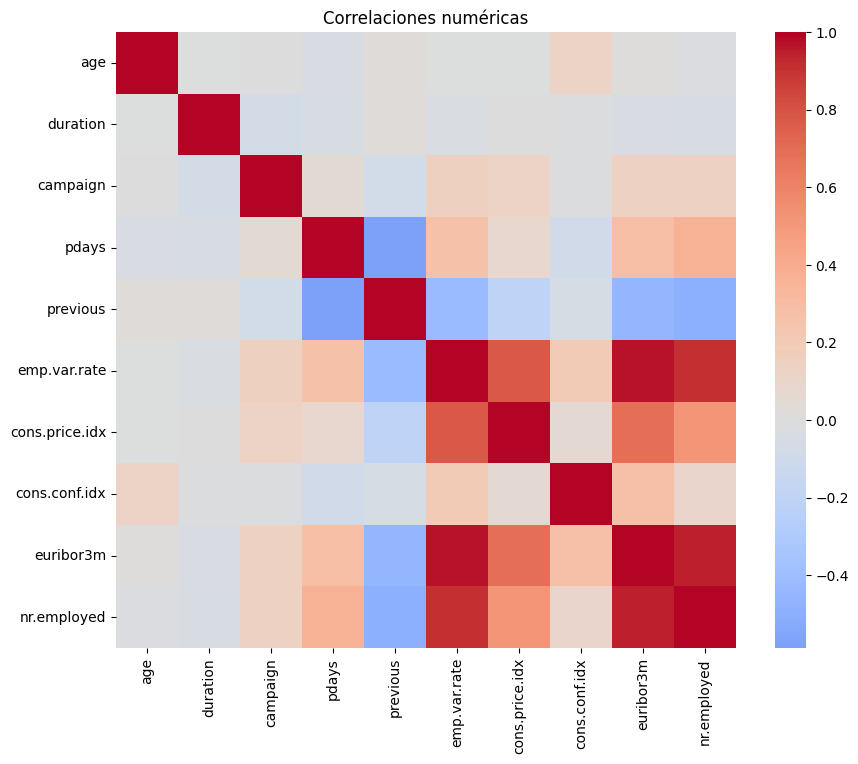

In [19]:
# obtenemos la correlación entre las variables numéricas para minimizar las mismas a la hora de modelar
corr = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlaciones numéricas")
plt.show()

In [20]:
# en este caso vemos que emp.var.rate, euribor3m, nr.employed,cons.conf.idx y cons.price.idx están muy correlacionadas entre sí

Con lo obtenido en nuestro EDA seleccionaremos las siguientes variables para analizar y
* job
* education
* month
* poutcome
* emp.var.rate (por lo visto en la matriz de correlación)
* age
* (duration no se utiliza porque es una variable que se obtiene después del contacto)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [22]:
# variables de interés
features = ["job", "education", "month", "poutcome", "emp.var.rate", "age"]
target = "y"

# X = datos de entrada, y = target
X = df[features]
y = (df[target] == "yes").astype(int)  # convertir y a 0/1

# separar en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, test_size=0.2, random_state=42
)

In [23]:
# Preprocesamiento: OneHot para categóricas, pasar numéricas tal cual
cat_cols = ["job", "education", "month", "poutcome"]
num_cols = ["emp.var.rate", "age"]

# ColumnTransformer permite aplicar transformaciones diferentes a distintas columnas del dataset 
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

# usamos Pipeline para evitar guardar por aparte lo reprocesado y luego entrenar el modelo
# lo dejamos simple con regresión logística y lo hacemos en un solo paso
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression())
])

In [24]:
# entrenamos
model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [25]:
# predicciones
y_pred = model.predict(X_test)

# evaluación
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8957271182325808
[[7211   92]
 [ 767  168]]


In [26]:
# tenemos un muy buen 89% de que el modelo prediga bien
# hagamos búsqueda aleatoria para ver si podemos mejorarlo un poco más

from sklearn.model_selection import RandomizedSearchCV

# Definimos los parámetros que queremos ajustar
# agregamos classifier_ porque usamos un pipeline
param_distributions = {
    "classifier__C": np.logspace(-4, 4, 20),
    "classifier__penalty": ["l1", "l2", "elasticnet", "none"],
    "classifier__solver": ["liblinear", "saga"],  # seguros con salida sparse
    "classifier__l1_ratio": [0.0, 0.5, 1.0]       # solo usado si penalty='elasticnet' y solver='saga'
}

# Inicializamos la búsqueda aleatoria
# en lugar de pasar el modelo pasamos pipeline
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=10, scoring="accuracy", cv=5, random_state=42, n_jobs=-1
)

In [27]:
random_search.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/sit

,estimator,Pipeline(step...egression())])
,param_distributions,"{'classifier__C': array([1.0000...00000000e+04]), 'classifier__l1_ratio': [0.0, 0.5, ...], 'classifier__penalty': ['l1', 'l2', ...], 'classifier__solver': ['liblinear', 'saga']}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [28]:
print(f"Mejores hiperparámetros: {random_search.best_params_}")

Mejores hiperparámetros: {'classifier__solver': 'saga', 'classifier__penalty': 'elasticnet', 'classifier__l1_ratio': 0.5, 'classifier__C': np.float64(4.281332398719396)}


In [29]:
# Mejores hiperparámetros: {'classifier__solver': 'saga', 'classifier__penalty': 'elasticnet', 'classifier__l1_ratio': 0.5, 'classifier__C': np.float64(4.281332398719396)}
# probemos
# el objeto random_search guarda el mejor modelo entrenado dentro de 
# random_search.best_estimator_

best_model = random_search.best_estimator_

# Predicciones en test
y_pred = best_model.predict(X_test)


In [30]:
# reevaluación
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8937848992473901
[[7188  115]
 [ 760  175]]


In [ ]:
# pues quedó igual :)